<a href="https://colab.research.google.com/github/hakanskn/Blindness-Detection/blob/main/Blindness_Detection_by_Feature_Extraction_from_CNN_%2B_SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAGGLE DATA

In [1]:
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#!cp kaggle.json ~/.kaggle/

!cp /content/drive/MyDrive/COMMON/APTOS_2019/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           6674        235  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           7176        265  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           8201        150  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [08:41<00:00, 18.6MB/s]
100% 9.51G/9.51G [08:41<00:00, 19.6MB/s]


In [ ]:
!mkdir aptos_2019

In [ ]:
!unzip aptos2019-blindness-detection.zip -d aptos_2019

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: aptos_2019/test_images/512beaada8f0.png  
  inflating: aptos_2019/test_images/51323e9d2070.png  
  inflating: aptos_2019/test_images/515675001b9e.png  
  inflating: aptos_2019/test_images/515877da2def.png  
  inflating: aptos_2019/test_images/5168ddccea88.png  
  inflating: aptos_2019/test_images/5172c056a687.png  
  inflating: aptos_2019/test_images/5177461f5339.png  
  inflating: aptos_2019/test_images/51910bcb980d.png  
  inflating: aptos_2019/test_images/51a3e9b6a1c0.png  
  inflating: aptos_2019/test_images/51bbd82feec8.png  
  inflating: aptos_2019/test_images/51de5fb8eccd.png  
  inflating: aptos_2019/test_images/51e88694c81f.png  
  inflating: aptos_2019/test_images/51f0bf8f1544.png  
  inflating: aptos_2019/test_images/51f57fb32840.png  
  inflating: aptos_2019/test_images/51fa42dc1415.png  
  inflating: aptos_2019/test_images/5276ab33b7b0.png  
  inflating: aptos_2019/test_images/52a353760f72.png  
  inflating: aptos

# LIBRARIES & CONFIGS

## GPU Info

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Aug  2 06:13:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Drive Mount Code

In [ ]:
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
# %cd /content
# !mkdir drive
# %cd drive
# !mkdir MyDrive
# %cd ..
# %cd ..
# !google-drive-ocamlfuse /content/drive/MyDrive

## Libraries

In [ ]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D, Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM
from keras import models
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from tensorflow.keras.optimizers import *
import glob
from pathlib import Path
from PIL import Image
import PIL
import copy
from tensorflow import keras
from keras.utils.layer_utils import count_params

from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
import pydot
import graphviz

from keras.models import model_from_json
!pip install ipython-autotime
%load_ext autotime


!pip install tensorflow_addons
import tensorflow_addons as tfa

from tensorflow.keras.callbacks import *
from tensorflow.keras.layers import *

%matplotlib inline
import datetime
import time
import gc
import shutil

from sklearn.model_selection import KFold, StratifiedKFold

!pip install -U tensorboard-plugin-profile

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

time: 10 s (started: 2023-08-02 06:14:08 +00:00)


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

print('TF Version:', tf.__version__)
print('TFA Version:', tfa.__version__)

1 Physical GPUs, 1 Logical GPUs
TF Version: 2.12.0
TFA Version: 0.21.0
time: 4.21 s (started: 2023-08-02 06:14:18 +00:00)


# VARIABLES & HYPERPARAMETERS

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20
LR = 0.003
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)
NUM_CLASSES = 5
_SPLIT_RATE = 0.9

_AUGMENTED = "TRUE"
AUGMENT_RATE_PER_CLASS = 0.1

data_type = ''
model_name = 'ResNet50_tuned'


# DeepCovX_NM3
# ResNet50_random
# ResNet50_tuned
# Vgg19_random
# Vgg19_tuned
# DenseNet121_random
# DenseNet121_tuned
# InceptionV3_random
# InceptionV3_tuned
# Ctroke
# BarisStroke
# AlexNet

# original_data
# median_data
# nlm_data
# tv_data
# wt_data

_DESC = 'setup_test'


CV_PARTS = 5

RANDOM_STATE = 42

#/content/drive/MyDrive/HAKANSKN - DR/Dersler/Tıpta Bilişim/Proje/Prostat
# /content/aptos_2019

root_path = '/content/aptos_2019/'#+ data_type + '/'
comparison_save_path = '/content/drive/MyDrive/COMMON/APTOS_2019/Results/' + model_name + '/' + model_name + '.xlsx'
root_folder_to_save = '/content/drive/MyDrive/COMMON/APTOS_2019/Results/' #root_path + 'Results/'
#BENIGN_DIR = root_path + 'BENIGN'
#MALIGN_DIR = root_path + 'MALIGN'

model_name_to_save = '_ep_' + str(EPOCHS) + '_bs_' + str(BATCH_SIZE)
datetime_suffix = str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S"))
print(datetime_suffix)

2023_08_02_06_15_38
time: 1.98 ms (started: 2023-08-02 06:15:38 +00:00)


# DATA SETTINGS

In [ ]:
df = pd.read_csv("/content/aptos_2019/train.csv")
df['id_code'] = root_path + "train_images/" + df['id_code'].astype(str) + ".png"
df.rename(columns = {'id_code':'FILE', 'diagnosis':'CATEGORY'}, inplace = True)
df = df.astype(str)
df.head()

,FILE,CATEGORY
0,/content/aptos_2019/train_images/000c1434d8d7.png,2
1,/content/aptos_2019/train_images/001639a390f0.png,4
2,/content/aptos_2019/train_images/0024cdab0c1e.png,1
3,/content/aptos_2019/train_images/002c21358ce6.png,0
4,/content/aptos_2019/train_images/005b95c28852.png,0


time: 62.8 ms (started: 2023-08-02 06:15:45 +00:00)


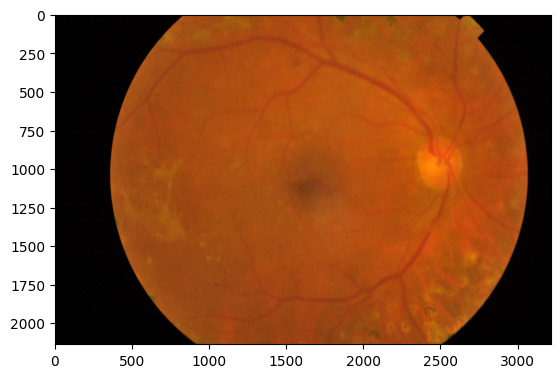

time: 1.29 s (started: 2023-08-02 06:15:48 +00:00)


In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread(df.iloc[1,0], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
plt.show()

In [ ]:
Main_Train_Data = df.sample(frac=1).reset_index(drop=True)
Main_Train_Data.head()

,FILE,CATEGORY
0,/content/aptos_2019/train_images/3b185ac445d0.png,4
1,/content/aptos_2019/train_images/da44f80b422b.png,2
2,/content/aptos_2019/train_images/5e5275ddee29.png,0
3,/content/aptos_2019/train_images/107aea0d9289.png,1
4,/content/aptos_2019/train_images/e83d315d8f98.png,2


time: 16.8 ms (started: 2023-08-02 06:15:53 +00:00)


In [ ]:
Main_Train_Data["CATEGORY"].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: CATEGORY, dtype: int64

time: 9.14 ms (started: 2023-08-02 06:15:56 +00:00)


In [ ]:
# train_data,test_data = train_test_split(Main_Train_Data,train_size=_SPLIT_RATE, random_state = RANDOM_STATE, stratify = JPG_Category_Series)
train_data,test_data = train_test_split(Main_Train_Data,train_size=_SPLIT_RATE, random_state = RANDOM_STATE, stratify = Main_Train_Data.CATEGORY)

print("train_data.shape: ", train_data.shape)
print("-----"*20)

print("test_data.shape: ", test_data.shape)
print("-----"*20)

# print("train_data first 3 rows:")
# print(train_data.iloc[0:3, 0].values)
# print("-----"*20)

# print("test_data first 3 rows:")
# print(test_data.iloc[0:3, 0].values)
# print("-----"*20)

train_data.shape:  (3295, 2)
----------------------------------------------------------------------------------------------------
test_data.shape:  (367, 2)
----------------------------------------------------------------------------------------------------
time: 11.8 ms (started: 2023-08-02 06:15:59 +00:00)


In [ ]:
test_data.to_csv("test_data.csv", index=False)

time: 14.2 ms (started: 2023-08-01 01:15:40 +00:00)


# FEATURE EXTRACTION

In [ ]:
train_data.columns

Index(['FILE', 'CATEGORY'], dtype='object')

time: 3.09 ms (started: 2023-08-02 06:16:12 +00:00)


In [ ]:
densenet_model = keras.applications.densenet
conv_model = densenet_model.DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
#conv_model.trainable = True

for layers in conv_model.layers:
    layers.trainable=False

print(conv_model.output)

29084464/29084464 [==============================] - 2s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")
time: 6.48 s (started: 2023-08-02 06:16:17 +00:00)


In [ ]:
conv_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

time: 2.15 ms (started: 2023-08-02 06:16:30 +00:00)


In [ ]:
feature_list = []
for path in train_data['FILE'].to_numpy():
    x = load_img(path,target_size=(IMG_WIDTH,IMG_WIDTH))
    img_array = img_to_array(x)
    img_array = np.expand_dims(img_array, axis=0)
    features = conv_model.predict(img_array)
    feature_list.append(features)

feat_lst = np.reshape(feature_list,(-1,4*4*1024))

1/1 [==============================] - 0s 44ms/step
time: 11min 19s (started: 2023-08-02 06:31:46 +00:00)


In [ ]:
print(feat_lst.shape)

(3295, 16384)
time: 1.68 ms (started: 2023-08-02 06:48:01 +00:00)


In [ ]:
gender = {'0': 0,'1': 1,'2': 2,'3': 3,'4': 4}
y = [gender[item] for item in train_data.CATEGORY]
len(y)

3295

time: 18.2 ms (started: 2023-08-02 06:49:17 +00:00)


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(feat_lst, y, test_size=0.2, random_state=RANDOM_STATE)

glm = LogisticRegression(C=0.1)
glm.fit(X_train,y_train)

LogisticRegression(C=0.1)

time: 35.9 s (started: 2023-08-02 06:49:33 +00:00)


In [ ]:
print("Accuracy on validation set using Logistic Regression: ",glm.score(X_test,y_test))

Accuracy on validation set using Logistic Regression:  0.7056145675265554
time: 171 ms (started: 2023-08-02 06:51:04 +00:00)


## Default SVM Classifier

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7011
time: 1min 25s (started: 2023-08-02 06:51:09 +00:00)


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7056
time: 1min 22s (started: 2023-08-02 07:07:20 +00:00)


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7056
time: 1min 22s (started: 2023-08-02 07:10:57 +00:00)


In [ ]:
# make predictions on train set
y_pred_train = svc.predict(X_train)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9917
time: 2min 2s (started: 2023-08-02 07:32:22 +00:00)


0.7056145675265554

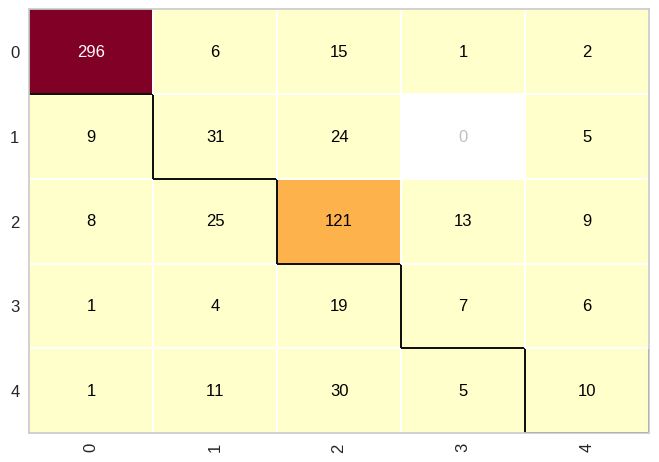

time: 52 s (started: 2023-08-02 07:38:33 +00:00)


In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

## Linear Kernel SVM Classifier

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6859
time: 1min 5s (started: 2023-08-02 08:04:50 +00:00)


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.6859
time: 1min 4s (started: 2023-08-02 08:06:28 +00:00)


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.6859
time: 1min 5s (started: 2023-08-02 08:07:33 +00:00)


## Ploynomial Kernel SVM Classifier

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7026
time: 1min 7s (started: 2023-08-02 08:08:39 +00:00)


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.6829
time: 1min 4s (started: 2023-08-02 08:09:46 +00:00)


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc1000=SVC(kernel='poly', C=1000.0)


# fit classifier to training set
poly_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000.0 : 0.6844
time: 1min 6s (started: 2023-08-02 08:10:51 +00:00)


## Sigmoid Kernel SVM Classifier

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5569
time: 1min (started: 2023-08-02 08:11:58 +00:00)


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.5493
time: 48.3 s (started: 2023-08-02 08:12:59 +00:00)


## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier
rf = RandomForestClassifier()

# fit classifier to training set
rf.fit(X_train,y_train)


# make predictions on test set
y_pred=rf.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Random Forest : 0.7238
time: 18.9 s (started: 2023-08-02 08:13:47 +00:00)
